# Gene expression part 03 
### Credit: Griffin Chure & Manuel Razo-Mejia

In part III of our matlab project, we will learn how to process a series of images, extract area values, and write our very first function! 

At the end of the last exercise, we saw that we had a distribution of areas, but it was pretty hard for us to identify good thresholds. Today, we'll get a better idea of what a typical cell looks like by segmenting even more cells.

We will begin by listing all of the phase images. 

In [1]:
% Ignore this line, I am just setting my working directory to where the data is
cd('~/Documents/PhD/RPGroup-PBoC_github/mbl_pboc_2016/src/')

In [2]:
phaseIms = dir('data/no_lac/noLac_phase*.tif');

The command `dir` lists all of the files that satisfy certain condition. For example here we are telling matlab to go into the `data/no_lac/` directory and find all the files that start with `noLac_phase` and end with `.tif` with a series of random characters in between (indicated by the `*`).

Let's look for the first 3 file name for example.

In [3]:
% Obtain the first 3 file names from the phaseIms structure
phaseIms(1:3).name

ans =

noLac_phase_0000.tif


ans =

noLac_phase_0001.tif


ans =

noLac_phase_0002.tif


Having this `phaseIms` structure becomes very handy. We can now use a simple `for` loop to obtain all of the areas from each image.

You might be thinking: But wait a second! We have taken 2 sessions so far to get to the point where we obtain an array with the areas of labeled objects in an image. I don't want to copy and paste `n` times that code for each image.

Well, you only don't have to but as good as a programmer that you are becoming you shouldn't even think about that. For this we will define our first beautiful function! 

By now you must be familiar with functions. We have used them from the very beginning. Functions such as `mat2gray`, `imhist`, `regionprops` receive an input, perform some computations and return some output afterwards. But what if there is not a function that does all the steps you want to follow at once? The you should define your own functions!

One of matlab's biggest weakness in my opinion is that it doesn't allow users to define functions in the same script where they are performing other operations. Functions need to live in single independent m-files where the name of the file needed to be the exact same as the name of the function. This version `matlab 2016b` tried modernizing the language to allow for [local functions](http://www.mathworks.com/help/matlab/matlab_prog/local-functions-in-scripts.html) to be defined in a script. But there are still shortcomes from this approach in my opinion.

## Defining a function to extract the areas of labeled objects.

The way that we define a function in matlab is as follows:

`function output(s) = name_of_the_function(parameter(s))`

    % Comments explaining how the function works

    Actual code performind the function
`end`

So before getting into our real function let's first try a simple one. Let's define a function that takes as input a matrix and returns the minimum and the maximum value on it.

In [ ]:
function [minVal, maxVal] = minMaxFn(array)
% This function returns the minimum and maximum value of any given array
% Parametrs
% ---------
% array : array-like
%    Array from which we want to obtain the minimum and maximum value.
% Returns
% -------
% minVal, maxVal : float
%    Minimum and maximum value respectively

minVal = min(array(:)); % Minimum value
maxVal = max(array(:)); % Maximum value

end %function

Now in the same directory I am working I have an m-file named `minMaxFn.m` as you can see if I list all the files in the directory.

In [4]:
ls

data				minMaxFn.m
gene_expression_part01.ipynb	segmenter.m
gene_expression_part02.ipynb	sizing_up_ecoli.ipynb
gene_expression_part03.ipynb


With this in hand let's see if I can actually generate an array with random numbers and obtain the maximum and minimum values.

In [5]:
randArray = rand([1, 10]);
[minVal, maxVal] = minMaxFn(randArray)

minVal =

    0.0975


maxVal =

    0.9649


It worked! So now we know how to define a function. Let's now define a relevant function for what we want to do.

Let's look at we want our function to do. I will go through the process as if I was able to define it here, but at the end of the day the function will actually need to live in a separate m-file.
1. First of all we want the function to take a file name and read the image.
2. Then we want to perform a Gaussian blur to correct the background.
3. Then we would like to choose some kind of threshold to pick up bacteria.
4. Finally we would like to extract the area of all the objects found in the labeled image.

We know how to do everything automatically, except for step 3 where we gave some manual input as to which threshold value to use. There are actually automatic thresholding methods such as [Otsu's method](https://en.wikipedia.org/wiki/Otsu%27s_method) that are [implemented in matlab](http://www.mathworks.com/help/images/ref/graythresh.html). So we'll make use of this method for that step.

In [ ]:
function [imLabel, areas] = segmenter(filename, radius)
%This function segments an image and returns the segmentation mask.
%
%Parameters:
%------------
% filename : string
%   Name of the image file to be segmented. 
% radius : float 
%   Radius to use during the gaussian blur smoothing. 

%Load the image. 
imPhase = imread(filename);
    
%Normalize it!
imNorm = mat2gray(imPhase);
    
%BPerform a Gaussian blur
imBlur = imgaussfilt(imNorm, radius);
% Extract the background
imSub = imNorm - imBlur;
% Renormalization
imSub = mat2gray(imSub);

% Use Otsu's method to get an automatic threshold
threshold = graythresh(imSub);

%Apply a threshold. 
imThresh = im2bw(imSub, threshold);
 
%Remove cells touching border. 
imThresh = imclearborder(imThresh);
%Label our image.
imLabel = bwlabel(imThresh);
    
%Extract the region properties of our image. 
props = regionprops(imLabel, 'Area');
areas = [props.Area];

end

Again in the same directory I have this same function defined on a file named `segmenter.m`. So let's test the function with one of the files we listed in `phaseIms`.

In [12]:
[imLabel, areas] = segmenter(strcat('data/no_lac/', phaseIms(1).name), 70);

Let's look at the resulting labeled image!

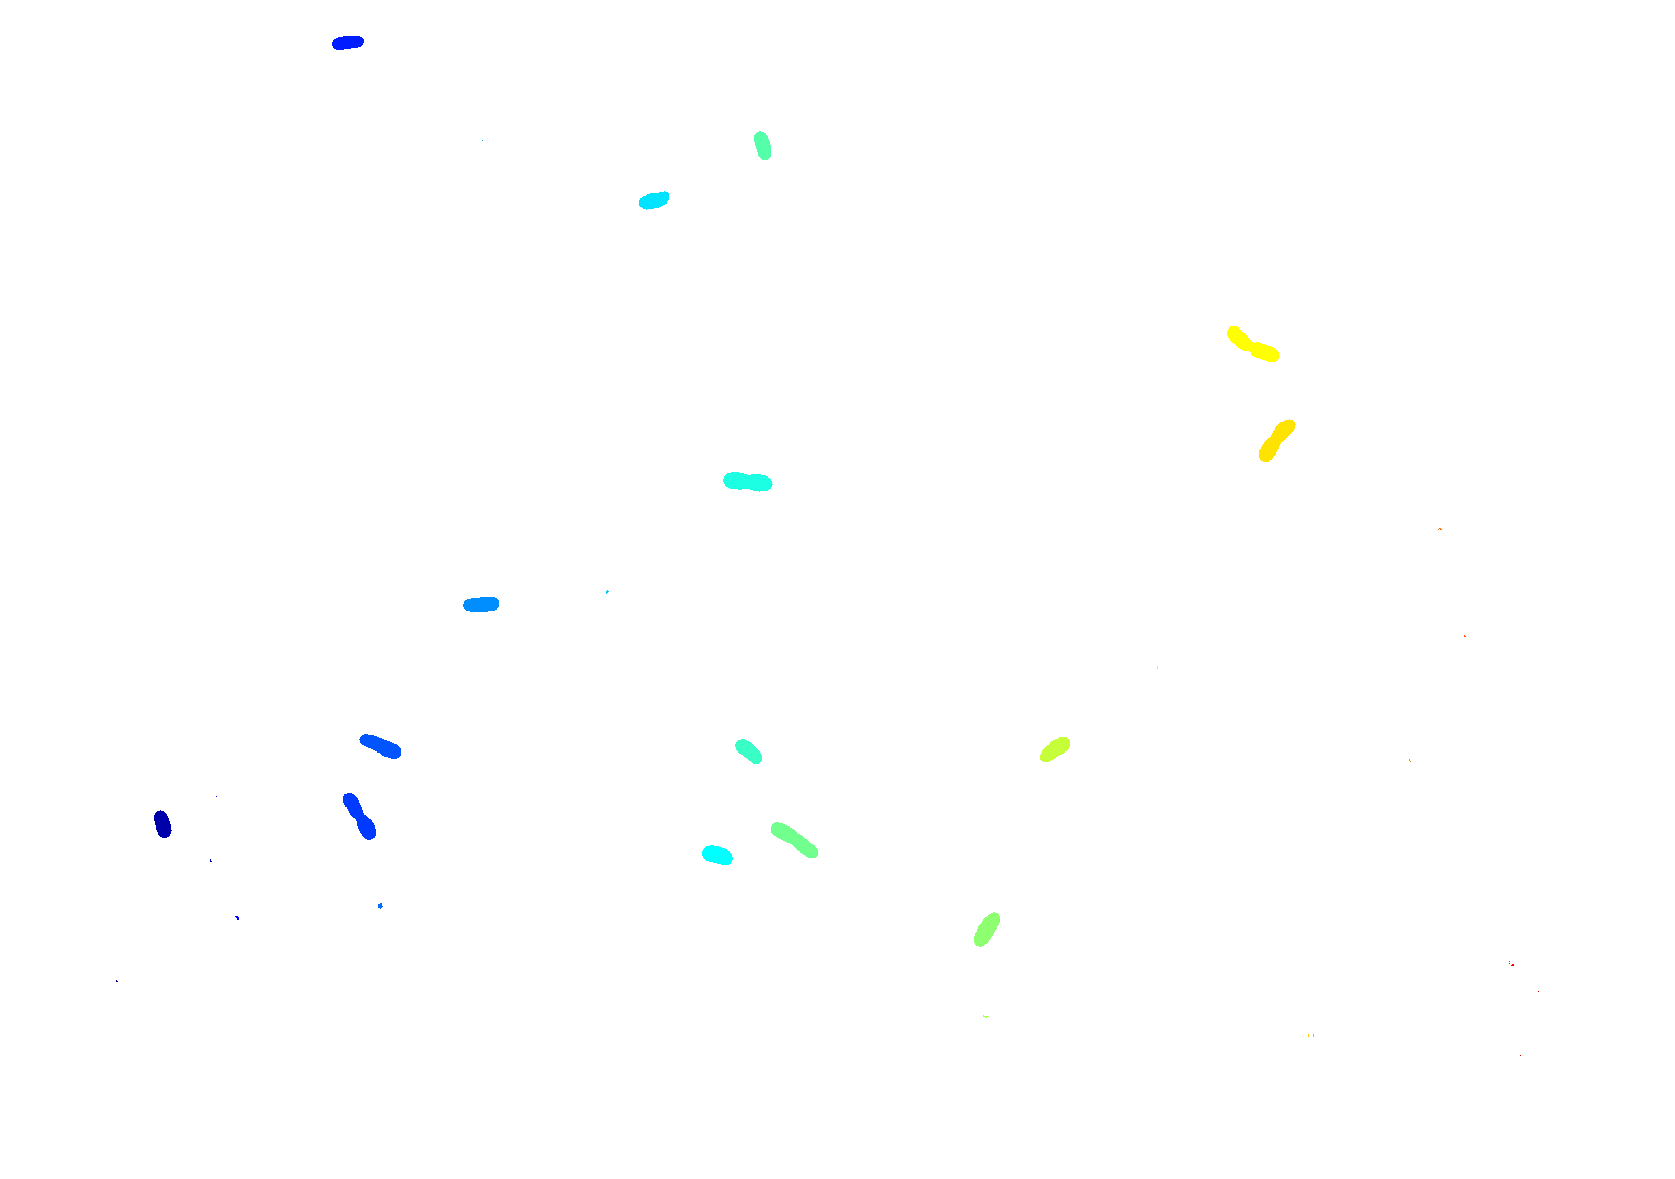

In [13]:
imshow(label2rgb(imLabel))

That looks pretty good! Seems that our function can automatically segment out bacteria-like objects given a phase contrast image.